In [30]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv("mouse_drug_data.csv")
clinical_trial_data_df=pd.read_csv("clinicaltrial_data.csv")

# Combine the data into a single dataset
data=pd.merge(mouse_drug_df,clinical_trial_data_df, on='Mouse ID')

# Display the data table for preview

data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
Mean_Tumor=data.groupby(["Drug","Timepoint"])
Mean_Tumor2=Mean_Tumor["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
Mean_Tumor3=pd.DataFrame(Mean_Tumor2)

# Preview DataFrame
Mean_Tumor3.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_Tumor=data.groupby(["Drug","Timepoint"])
SE_Tumor2=SE_Tumor["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
SE_Tumor3=pd.DataFrame(SE_Tumor2)

# Preview DataFrame
SE_Tumor3.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [34]:
# Minor Data Munging to Re-Format the Data Frames 
Mean_munging = Mean_Tumor3.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked

Mean_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [35]:
# Minor Data Munging to Re-Format the Data Frames 
SE_munging = SE_Tumor3.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked

SE_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [50]:
Mean_munging.index


Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

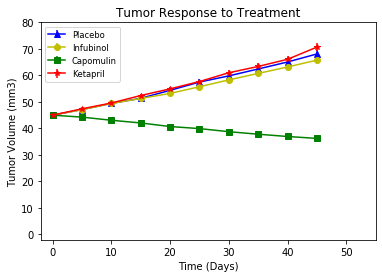

In [77]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(Mean_munging.index, Mean_munging['Placebo'],yerr=SE_munging['Placebo'],color='b',fmt='^-', label="Placebo")

ax.errorbar(Mean_munging.index, Mean_munging['Infubinol'],yerr=SE_munging['Infubinol'],color='y',fmt='o-', label="Infubinol")

ax.errorbar(Mean_munging.index, Mean_munging['Capomulin'],yerr=SE_munging['Capomulin'],color='g',fmt='s-', label="Capomulin")

ax.errorbar(Mean_munging.index, Mean_munging['Ketapril'],yerr=SE_munging['Ketapril'],color='r',fmt='*-', label="Ketapril")

ax.set_xlim(-2,55)

ax.set_ylim(-2,80)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")
plt.legend(loc="best",fontsize="small")

plt.show()

# Save the Figure



In [78]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [79]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
Mean_Met=data.groupby(["Drug","Timepoint"])
Mean_Met2=Mean_Met["Metastatic Sites"].mean()

# Convert to DataFrame
Mean_Met3=pd.DataFrame(Mean_Met2)

# Preview DataFrame
Mean_Met3.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [80]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_Met=data.groupby(["Drug","Timepoint"])
SE_Met2=SE_Met["Metastatic Sites"].sem()

# Convert to DataFrame
SE_Met3=pd.DataFrame(SE_Met2)

# Preview DataFrame
SE_Met3.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [81]:
# Minor Data Munging to Re-Format the Data Frames 
Mean_munging2 = Mean_Met3.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked

Mean_munging2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [82]:
# Minor Data Munging to Re-Format the Data Frames
SE_munging2 = SE_Met3.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked

SE_munging2.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


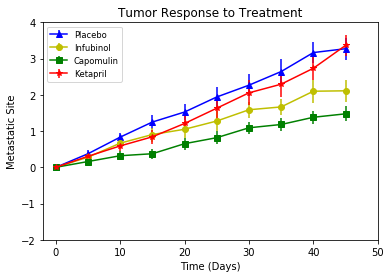

In [83]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(Mean_munging2.index, Mean_munging2['Placebo'],yerr=SE_munging2['Placebo'],color='b',fmt='^-', label="Placebo")

ax.errorbar(Mean_munging2.index, Mean_munging2['Infubinol'],yerr=SE_munging2['Infubinol'],color='y',fmt='o-', label="Infubinol")

ax.errorbar(Mean_munging2.index, Mean_munging2['Capomulin'],yerr=SE_munging2['Capomulin'],color='g',fmt='s-', label="Capomulin")

ax.errorbar(Mean_munging2.index, Mean_munging2['Ketapril'],yerr=SE_munging2['Ketapril'],color='r',fmt='*-', label="Ketapril")

ax.set_xlim(-2,50)

ax.set_ylim(-2,4)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Site")
ax.set_title("Tumor Response to Treatment")
plt.legend(loc="best",fontsize="small")

plt.show()

# Save the Figure



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [84]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=data.groupby(["Drug","Timepoint"])
mice_count2=mice_count["Mouse ID"].nunique()

# Convert to DataFrame
mice_count3=pd.DataFrame(mice_count2)
# Preview DataFrame
mice_count3.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [85]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_munging = mice_count3.pivot_table(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview that Reformatting worked

mice_count_munging.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


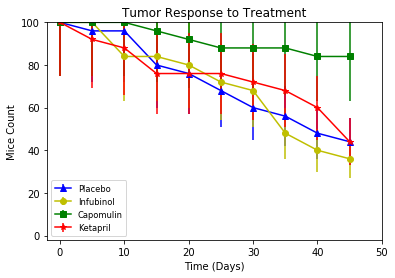

In [91]:
fig, ax = plt.subplots()
ax.errorbar(mice_count_munging.index, (mice_count_munging['Placebo']/25) *100,yerr=mice_count_munging['Placebo'],color='b',fmt='^-', label="Placebo")

ax.errorbar(mice_count_munging.index, (mice_count_munging['Infubinol']/25) *100,yerr=mice_count_munging['Infubinol'],color='y',fmt='o-', label="Infubinol")

ax.errorbar(mice_count_munging.index, (mice_count_munging['Capomulin']/25) *100,yerr=mice_count_munging['Capomulin'],color='g',fmt='s-', label="Capomulin")

ax.errorbar(mice_count_munging.index, (mice_count_munging['Ketapril']/25) *100,yerr=mice_count_munging['Ketapril'],color='r',fmt='*-', label="Ketapril")

ax.set_xlim(-2,50)

ax.set_ylim(-2,100)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Mice Count")
ax.set_title("Tumor Response to Treatment")
plt.legend(loc="best",fontsize="small")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [94]:
percent_change=data.groupby(["Drug"])
percent_change2=percent_change["Tumor Volume (mm3)"].pct_change()
# Calculate the percent changes for each drug

# Display the data to confirm
percent_change2

0            NaN
1       0.051411
2       0.012488
3       0.017344
4       0.048784
          ...   
1901   -0.319177
1902    0.035307
1903    0.030693
1904    0.065440
1905    0.034827
Name: Tumor Volume (mm3), Length: 1906, dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)